<a href="https://colab.research.google.com/github/Harshi141006/codsoft/blob/main/Movie_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Dataset

In [ ]:
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='ISO-8859-1')
print("Original dataset shape:", df.shape)
print("\nMissing values in each column:")
print(df.isnull().sum())
print("\nFirst 5 rows of data:")
print(df.head())

Original dataset shape: (15509, 10)

Missing values in each column:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

First 5 rows of data:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plab

#Step 3: Clean and preprocess data



In [ ]:
df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Duration'] = df['Duration'].astype(str).str.extract(r'(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.dropna(subset=['Rating'], inplace=True)
df['Year'].fillna(df['Year'].median(), inplace=True)
df['Duration'].fillna(df['Duration'].median(), inplace=True)
df['Votes'].fillna(df['Votes'].median(), inplace=True)
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col].fillna('Unknown', inplace=True)

# Step 4: Feature selection




In [ ]:
features = ['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'
X = df[features]
y = df[target]
print(" After cleaning:")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

 After cleaning:
Shape of X: (7919, 8)
Shape of y: (7919,)


# Step 5: Preprocessing

In [ ]:
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
numerical_features = ['Year', 'Duration', 'Votes']
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='Unknown'),
    OneHotEncoder(handle_unknown='ignore')
)
numerical_transformer = make_pipeline(
    SimpleImputer(strategy='mean')
)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 6:  Train-test split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(" Data split done.")

 Data split done.


# Step 7: Define and train the model

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)
print(" Model trained successfully.")

 Model trained successfully.


# Step 8:Predict and evaluate

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\n Model Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


 Model Evaluation:
Mean Squared Error: 3.88
R² Score: -1.09


# Step 9:Plot actual vs predicted ratings

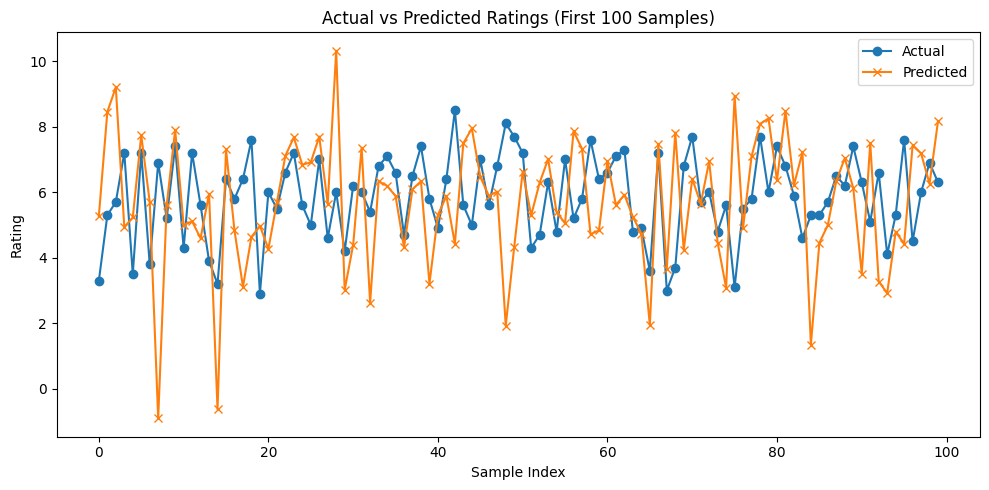

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title("Actual vs Predicted Ratings (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Rating")
plt.legend()
plt.tight_layout()
plt.show()